# Projeto Final de Introdução à Ciência de Dados

## Introdução 

Considerando as relevantes contribuições femininas para a área da Tecnologia da Informação(TI) e outras áreas relacionadas, é surpreendente constatar a proporção reduzida de mulheres matriculadas em cursos de graduação e empregadas no campo da TI no Brasil e em escala global. Até a década de 1980 a computação era algo associado a mulheres, assim como a atividade de programar Santos(2019). Porém, esse cenário mudou completamente após o advento do Personal Computer(PC) e atualmente há uma predominância masculina na área da computação.

Existem várias razões que podem contribuir para essa desproporção, incluindo estereótipos de gênero (originados principalmente após a difusão dos PCs), falta de representação de mulheres na área de tecnologia (tanto na acadêmica quanto no mercado de trabalho) e falta de políticas para promover a diversidade e a inclusão (uma questão estrutural da sociedade como todo). Alguns esforços estão sendo feitos para mudar essa tendência, como programas de mentoria e encorajamento para meninas e mulheres interessadas em estudar programação, bem como ações afirmativas para aumentar a representação de mulheres na área.

Mesmo com essas iniciativas existentes, a discrepância de gênero continua e preocupa a comunidade acadêmica de tal forma que esse assunto tem sido cada vez mais discutido. A própria Sociedade Brasileira de Computação (SBC) criou o Women in Technology (WIT), iniciativa que objetiva discutir assuntos relacionados a questões de gênero na TI, realizando análises da participação feminina na área em diferentes escalas, discutindo as iniciativas e atividades existentes para mitigar ou suavizar a disparidade de gênero e ainda debatendo problemas correlatos Bordin(2021). 

## Definição do Problema

Dada a importância e relevância desse tema, esse trabalho aspira adicionar contribuições ao realizar uma análise, nunca realizada antes, da participação feminina nos cursos de computação da UFES, especificamente do campus Goiabeiras. Para tal atividade serão utilizadas ferramentas automatizadas de análise e visualização de dados, bem como medidas estatísticas descritivas e ferramentas de estatística inferencial. Ao final, espera-se poder delinear um perfil de ingressantes e egressas dos cursos, disponibilizar aos colegiados dos cursos de Ciência da Computação e Engenharia de Computação para contribuir na elaboração de estratégias de atração e de permanência de mulheres nos cursos de Computação da UFES.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#### FUNÇÕES ÚTEIS

In [8]:

def crosstabper(df, col):
      
  #total por linha
  tab = pd.crosstab(df[col],df['SEXO'])
  tab["TOTAL"] = tab["F"] + tab["M"] + tab["N"]
  
  #total por coluna
  tabper = pd.crosstab(df[col],df['SEXO']).apply(lambda r: r/r.sum(), axis=0) * 100
  
  return tab,tabper

def classes(row):
    if (row.ANO_INGRESSO >= 1900) & (row.ANO_INGRESSO < 1995):
        return "1990-1994"
    elif (row.ANO_INGRESSO >= 1995) & (row.ANO_INGRESSO < 2000):
        return "1995-1999"
    elif (row.ANO_INGRESSO >= 2000 ) & (row.ANO_INGRESSO < 2005):
        return "2000-2004"
    elif (row.ANO_INGRESSO >= 2005 ) & (row.ANO_INGRESSO < 2010):
        return "2005-2009"
    elif (row.ANO_INGRESSO >= 2010 ) & (row.ANO_INGRESSO < 2015):
        return "2010-2014"
    elif (row.ANO_INGRESSO >= 2015 ) & (row.ANO_INGRESSO < 2020):
        return "2015-2019"
    else:
        return "2020-"


## Descrição do Conjunto de Dados

Dados anonimizados de todos os alunos (engenharia e ciência da computação) fornecidos pela PROPLAN

In [9]:
path = "C:\\Users\\USER\\Documents\\GitHub\\mulherescomputacao\\DadosRebeca.csv"
df = pd.read_csv(path)

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NOME_ALUNO         2461 non-null   object 
 1   SEXO               2461 non-null   object 
 2   IDADE              2454 non-null   float64
 3   ESTADO_CIVIL       2437 non-null   object 
 4   ETNIA              2461 non-null   object 
 5   COD_CURSO          2461 non-null   int64  
 6   NOME_CURSO         2461 non-null   object 
 7   ANO_INGRESSO       2461 non-null   int64  
 8   FORMA_INGRESSO     2461 non-null   object 
 9   PERIODO_INGRESSO   2461 non-null   object 
 10  ANO_EVASAO         2461 non-null   int64  
 11  PERIODO_EVASAO     1612 non-null   object 
 12  FORMA_EVASAO       2461 non-null   object 
 13  NUM_PERIODOS       2461 non-null   int64  
 14  NUM_MAX_PERIODOS   2461 non-null   int64  
 15  CH_TOTAL_CURSO     2461 non-null   int64  
 16  COTISTA            2461 

## Metodologia

In [11]:
masc = df[df['SEXO'] == 'M'] 
femi = df[df['SEXO'] == 'F']
eng = df[df['COD_CURSO'] == 5]
ccomp = df[df["COD_CURSO"] == 11]
formados = df[df["FORMA_EVASAO"] == "Formado"]
desistentes = df[df["FORMA_EVASAO"] == "Formado"]
cursando = df[df["FORMA_EVASAO"] == "Sem evasão"]

In [29]:
tab_ano, tabper_ano = crosstabper(ccomp,"F")
tabper_ano

SEXO,F,M,N
ANO_INGRESSO,,,
1990,3.846154,1.330377,0.0
1991,3.846154,2.993348,0.0
1992,4.395604,2.549889,0.0
1993,6.593407,2.439024,0.0
1994,3.846154,2.993348,0.0
1995,8.241758,3.215078,0.0
1996,8.241758,2.549889,0.0
1997,8.241758,2.771619,0.0
1998,3.846154,2.217295,0.0


### Histórico da Presença Feminina na UFES

De acordo com dados do (INEP), em 2019, apenas 23,9% dos alunos matriculados em cursos de graduação em computação no Brasil eram mulheres. Isso é comparativamente menor do que a média geral de participação feminina em cursos de graduação no país, que é de 39,3%

In [12]:
print("Engenharia")
print(eng["SEXO"].value_counts())
print("Ciência")
print(ccomp["SEXO"].value_counts())
print("Geral")
print(df["SEXO"].value_counts())

Engenharia
M    1212
F     162
N       2
Name: SEXO, dtype: int64
Ciência
M    902
F    182
N      1
Name: SEXO, dtype: int64
Geral
M    2114
F     344
N       3
Name: SEXO, dtype: int64


Porcentagem de Mulheres na Ciência: 17%

Porcentagem de Mulheres na Engenharia: 12%

Porcentagem de Mulheres no Geral: 14%

Segundo a análise dos dados dos cursos de TI entre 2009 a 2018 extraidos do INEP feita em  Cursino e Martinez (2021), a porcentagem começa em 20% e finaliza em 15%
A UFES é diferente mas não tão diferente.


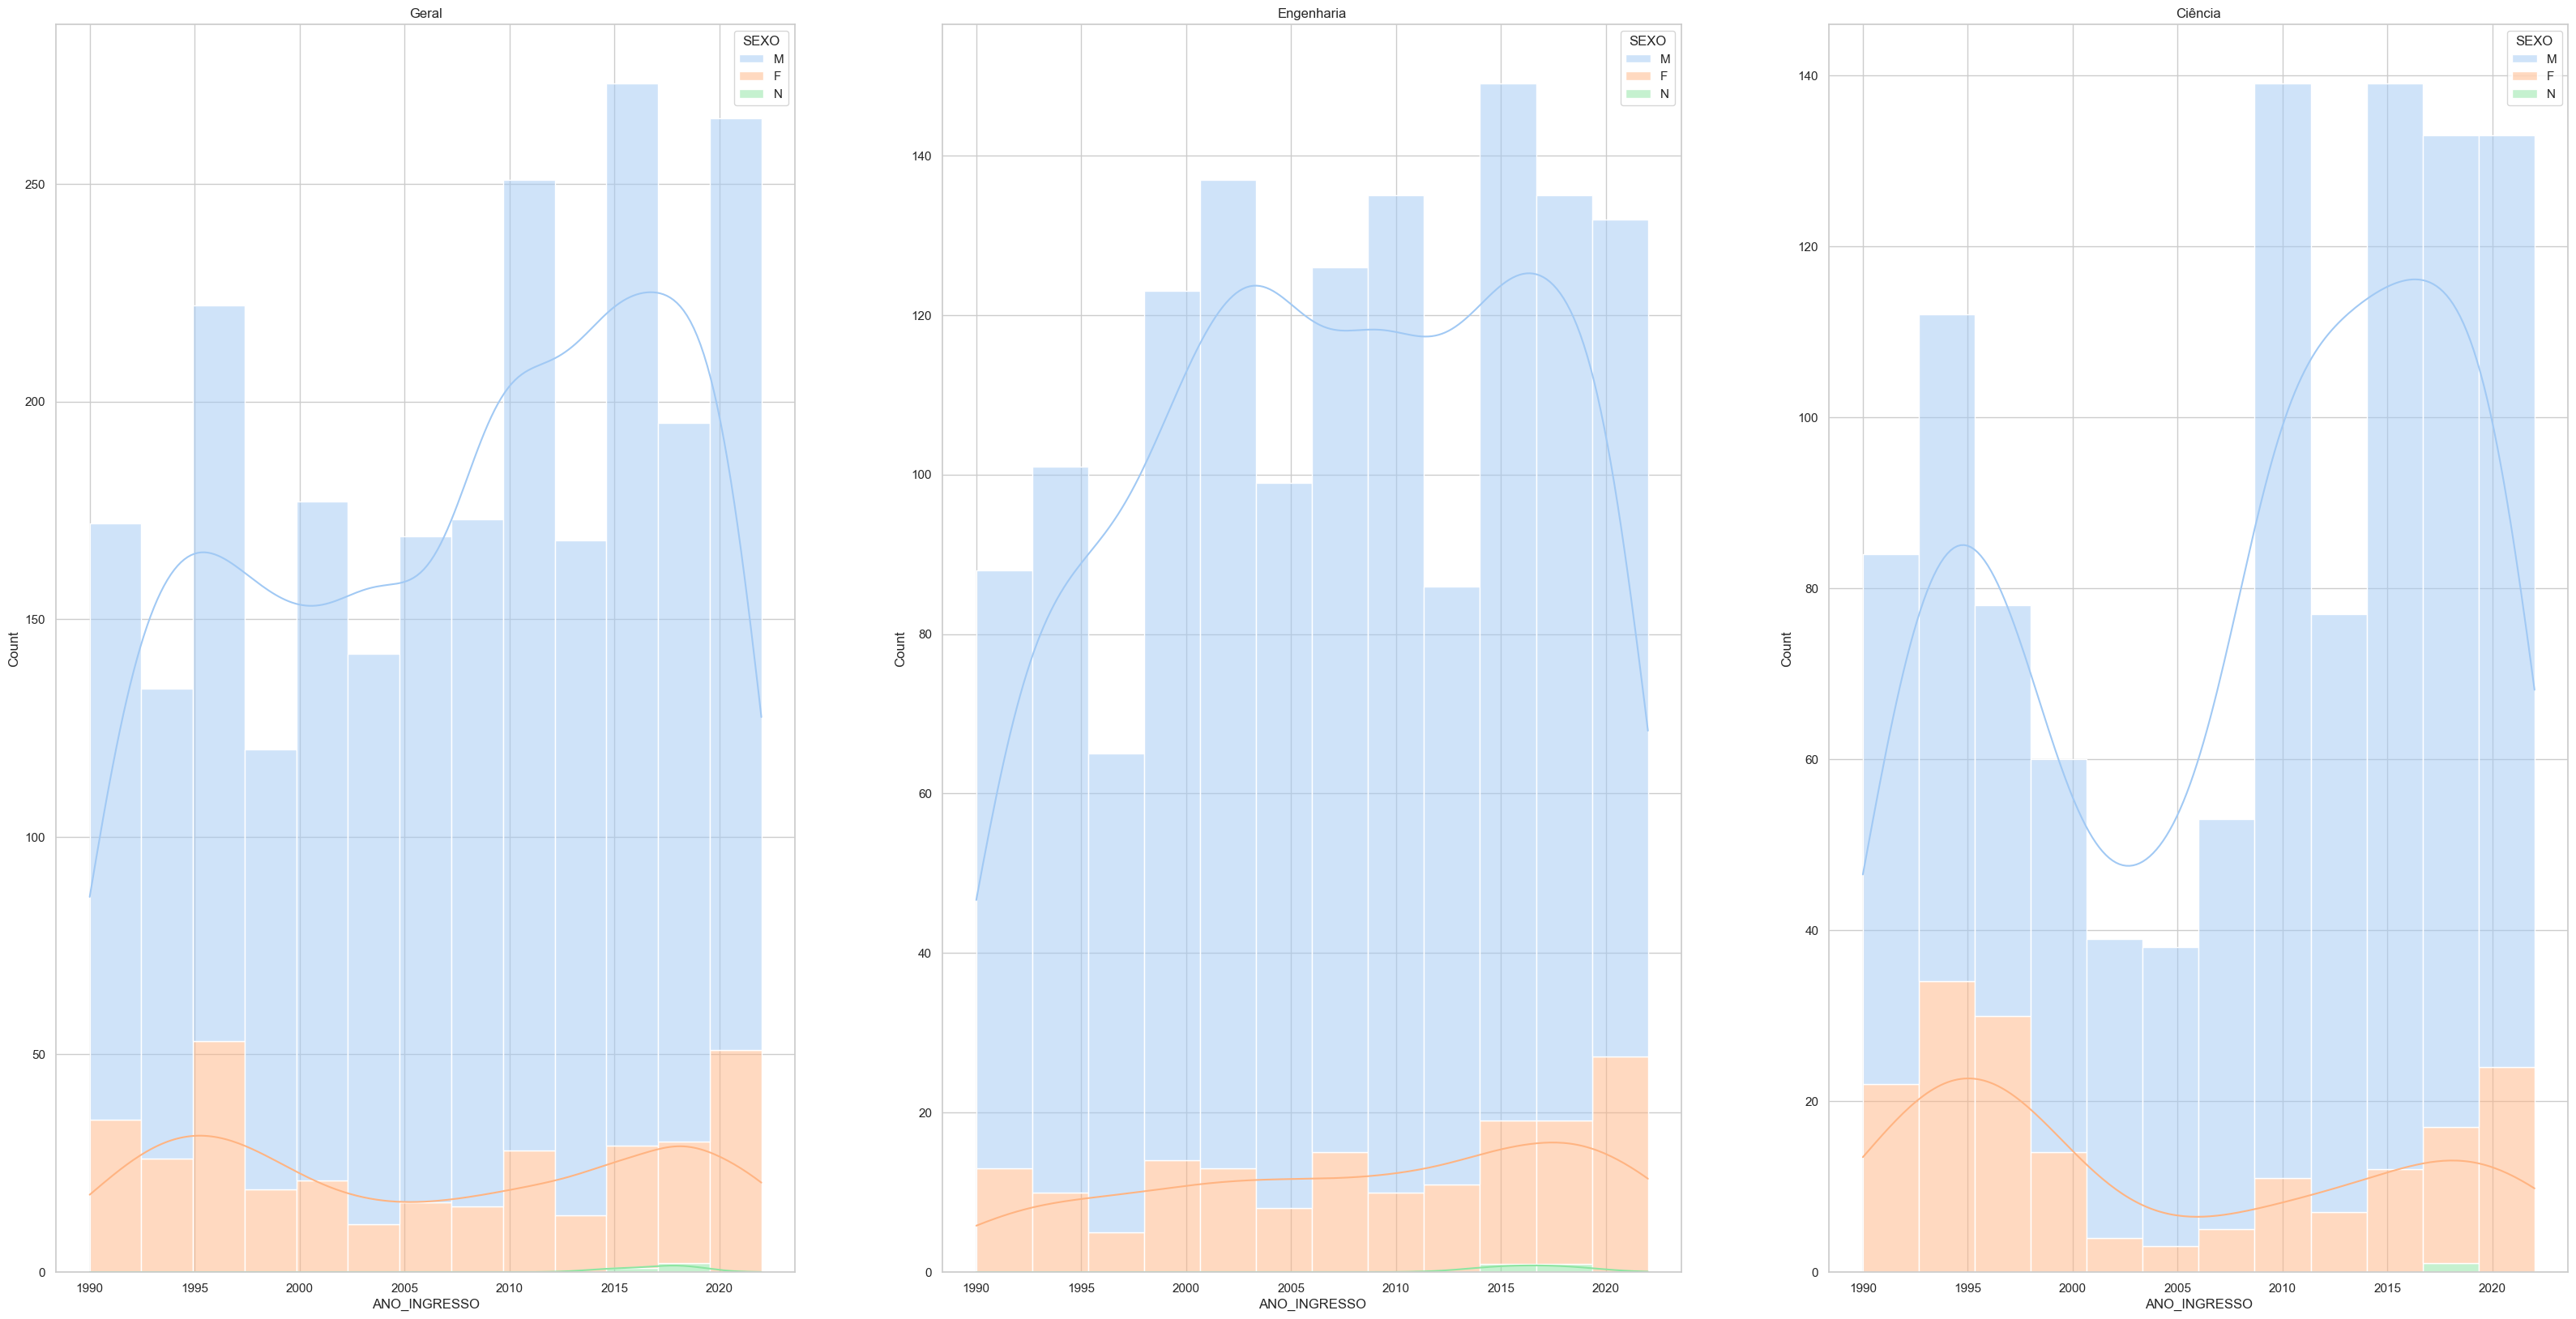

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(40, 20))
sns.histplot(data=df, x="ANO_INGRESSO",kde=True, hue="SEXO",multiple="stack",ax=axs[0])
sns.histplot(data=eng, x="ANO_INGRESSO",kde=True,hue="SEXO",multiple="stack",ax=axs[1])
sns.histplot(data=ccomp, x="ANO_INGRESSO",kde=True, hue="SEXO",multiple="stack",ax=axs[2])
axs[0].set_title("Geral")
axs[1].set_title("Engenharia")
axs[2].set_title("Ciência")
plt.show()

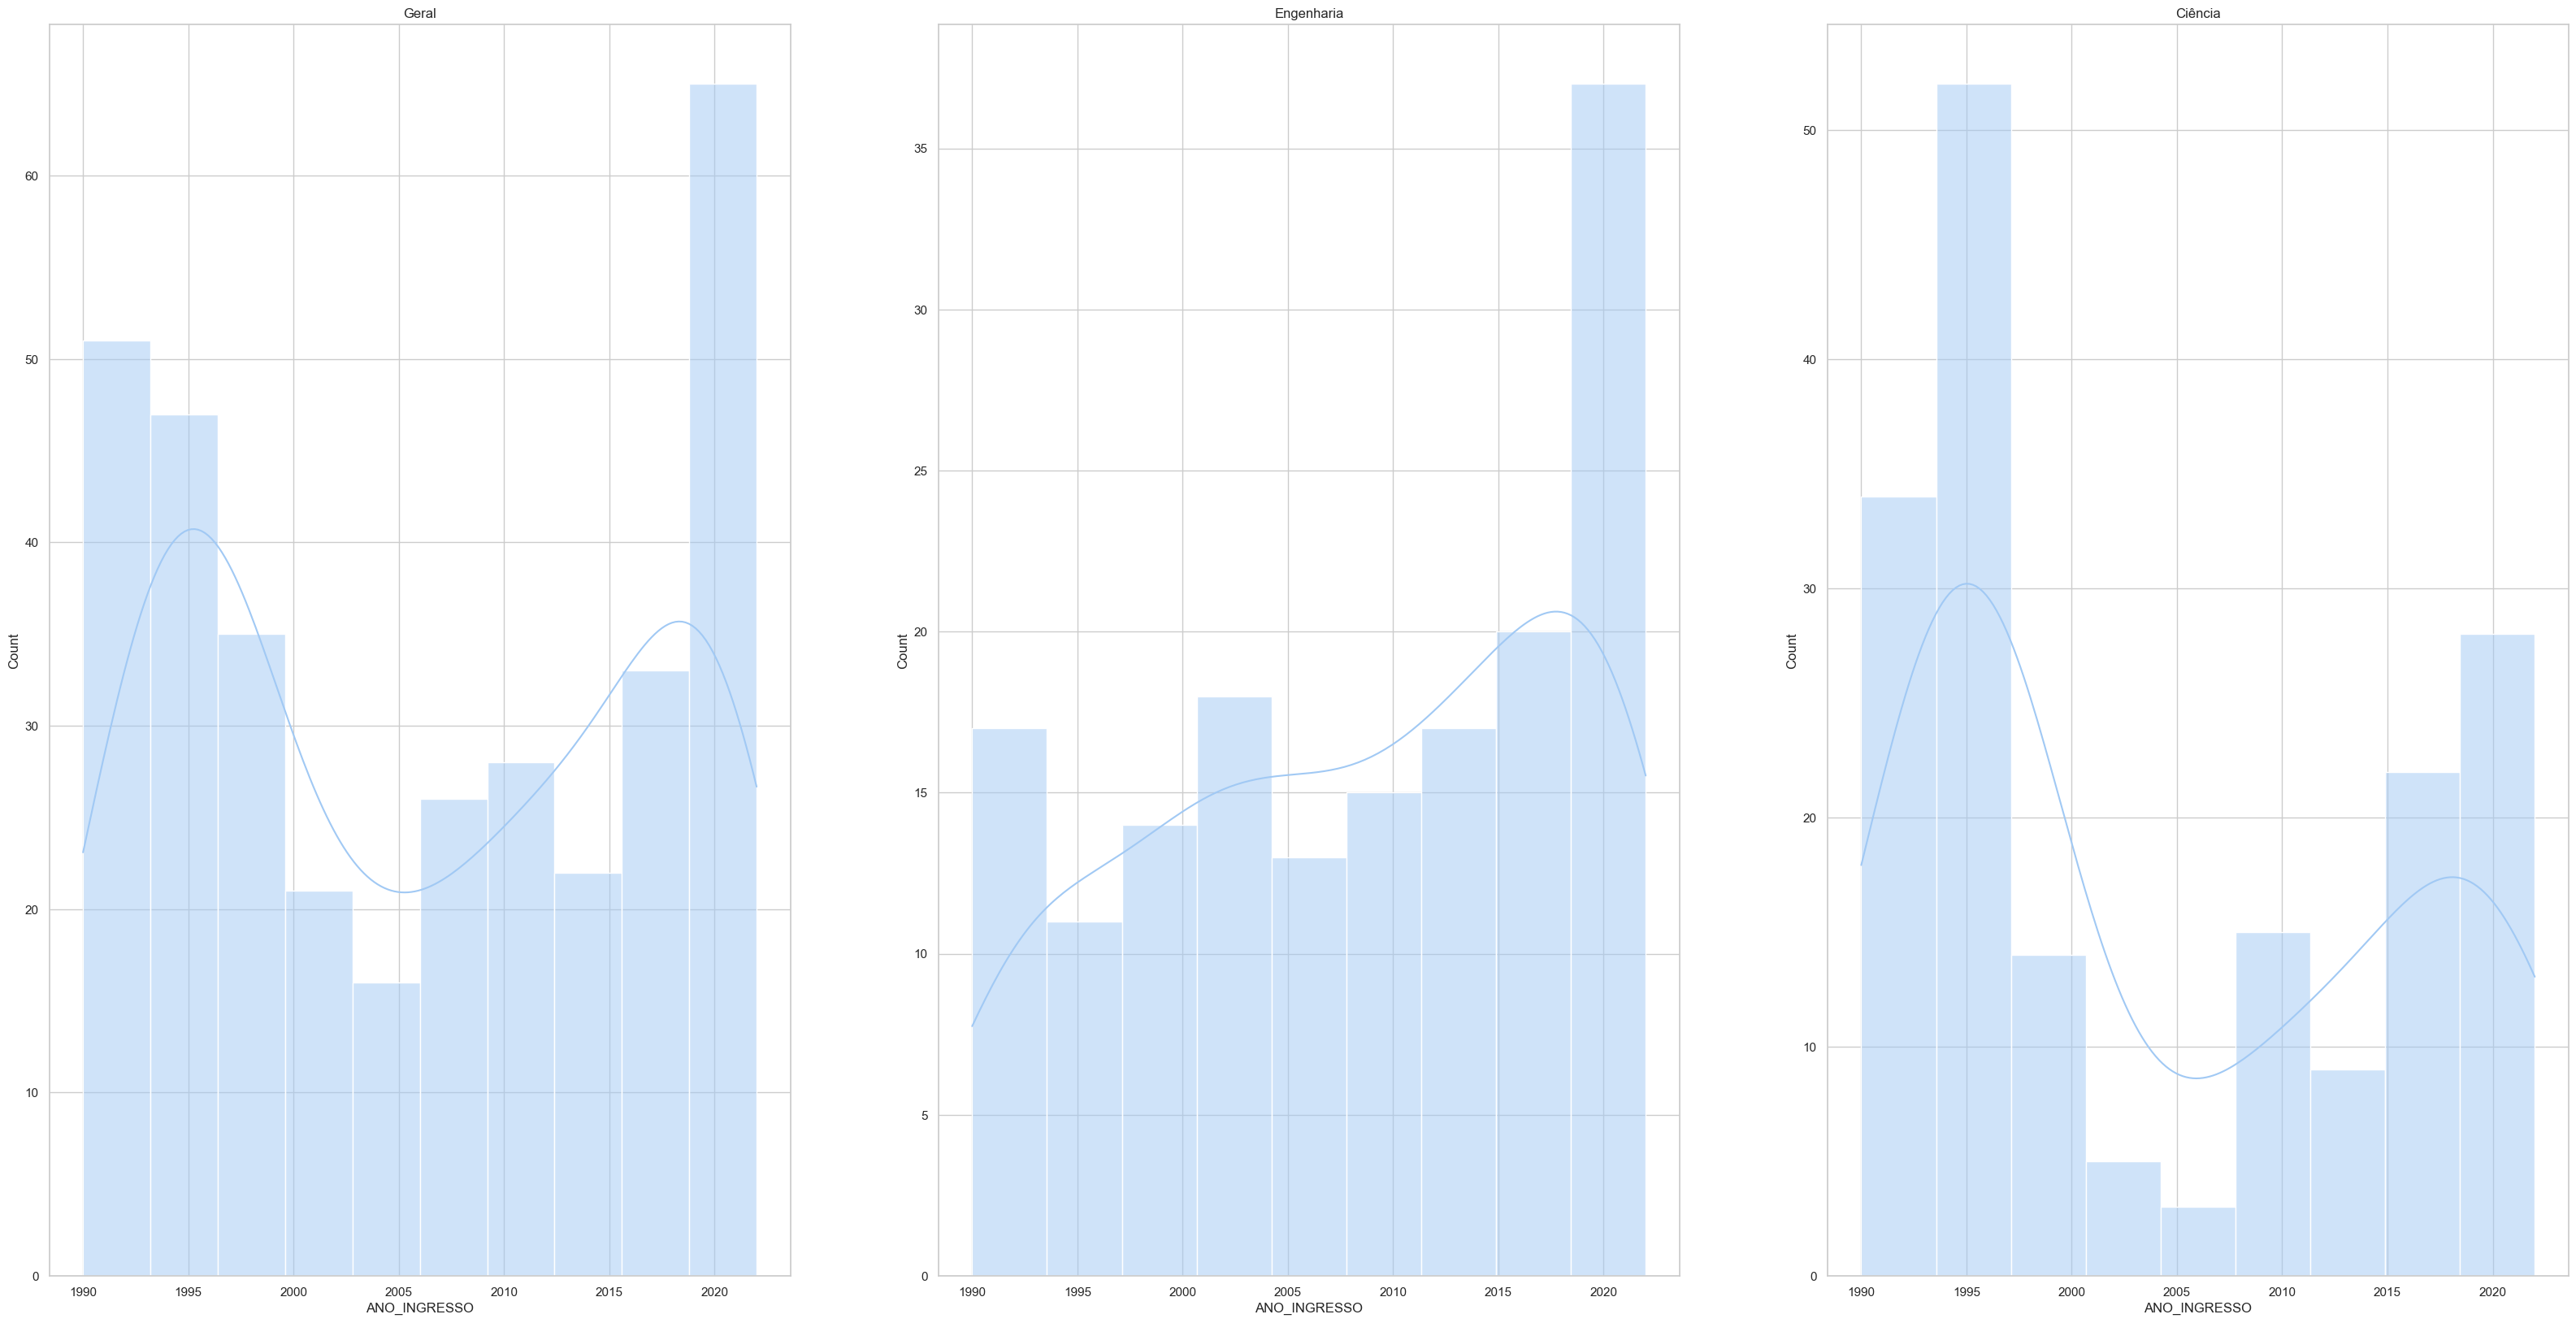

In [14]:
femi_ccomp = femi[femi['COD_CURSO'] == 11]
femi_eng = femi[femi['COD_CURSO'] == 5]

fig, axs = plt.subplots(1, 3, figsize=(40, 20))
sns.histplot(data=femi, x="ANO_INGRESSO",kde=True,multiple="stack",ax=axs[0])
sns.histplot(data=femi_eng, x="ANO_INGRESSO",kde=True,multiple="stack",ax=axs[1])
sns.histplot(data=femi_ccomp, x="ANO_INGRESSO",kde=True,multiple="stack",ax=axs[2])
axs[0].set_title("Geral")
axs[1].set_title("Engenharia")
axs[2].set_title("Ciência")
plt.show()

### Presença feminina atualmente

In [15]:
print("Engenharia")
eng_cursando = eng[eng['FORMA_EVASAO'] == "Sem evasão"]
print(eng_cursando["SEXO"].value_counts())
print("Ciência")
ccomp_cursando = ccomp[ccomp['FORMA_EVASAO'] == "Sem evasão"]
print(ccomp_cursando["SEXO"].value_counts())
print("Geral")
print(cursando["SEXO"].value_counts())


Engenharia
M    199
F     41
Name: SEXO, dtype: int64
Ciência
M    185
F     35
Name: SEXO, dtype: int64
Geral
M    384
F     76
Name: SEXO, dtype: int64


Porcentagem geral de mulheres é 16.5%, para ciência é 15.9%, para engenharia 17%

Existem instâncias de alunos com o Sexo = N, acredito ser algum erro ao cadastrar pois na época que foram matriculados não existia a opção sexo "neutro" se é que existe atualmente

In [16]:
df[df["SEXO"] == 'N']

,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,FORMA_INGRESSO,PERIODO_INGRESSO,...,NUM_PERIODOS,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS
1085,Aluno 1086,N,18.3,Solteiro(a),Branca,5,Engenharia de Computação,2015,Vestibular,1º Semestre,...,10,15,4215,N,SERRA,Espírito Santo,Brasil,"1,8421",1.51,0
1187,Aluno 1188,N,19.2,Solteiro(a),Parda,5,Engenharia de Computação,2018,SISU,1º Semestre,...,10,15,4215,S,VILA VELHA,Espírito Santo,Brasil,"4,1257",4.67,0
2084,Aluno 2085,N,18.1,Solteiro(a),Branca,11,Ciência da Computação,2018,SISU,1º Semestre,...,9,13,3590,N,VITORIA,Espírito Santo,Brasil,"4,6065",5.88,0


In [17]:
df["IDADE"].describe()

count    2454.000000
mean       19.973798
std         3.694254
min        16.000000
25%        18.100000
50%        18.900000
75%        20.300000
max        58.200000
Name: IDADE, dtype: float64

In [18]:
df.groupby("SEXO")['IDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,342.0,19.331871,2.305408,16.5,18.0,18.7,19.80,34.7
M,2109.0,20.079943,3.865220,16.0,18.1,18.9,20.40,58.2
N,3.0,18.533333,0.585947,18.1,18.2,18.3,18.75,19.2


In [19]:
eng.groupby("SEXO")["IDADE"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,162.0,19.246914,2.460172,16.9,18.000,18.60,19.500,34.7
M,1210.0,19.760661,3.360352,16.5,18.000,18.70,20.000,49.9
N,2.0,18.750000,0.636396,18.3,18.525,18.75,18.975,19.2


In [20]:
ccomp.groupby("SEXO")["IDADE"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,180.0,19.408333,2.160744,16.5,18.1,18.8,20.2,30.3
M,899.0,20.509677,4.421048,16.0,18.1,19.1,21.0,58.2
N,1.0,18.100000,NaN,18.1,18.1,18.1,18.1,18.1


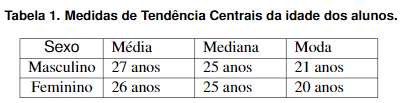 Fonte:  Cursino e Martinez (2021)

A média da ufes é siginificativamente maior, mas na análise feita pelas autoras foram analisados todos os cursos de TI e de ambas instituições públicas e privadas. Mas assim como na análise feita por elas a diferença entre as idades das mulheres e dos homens não é significativa.

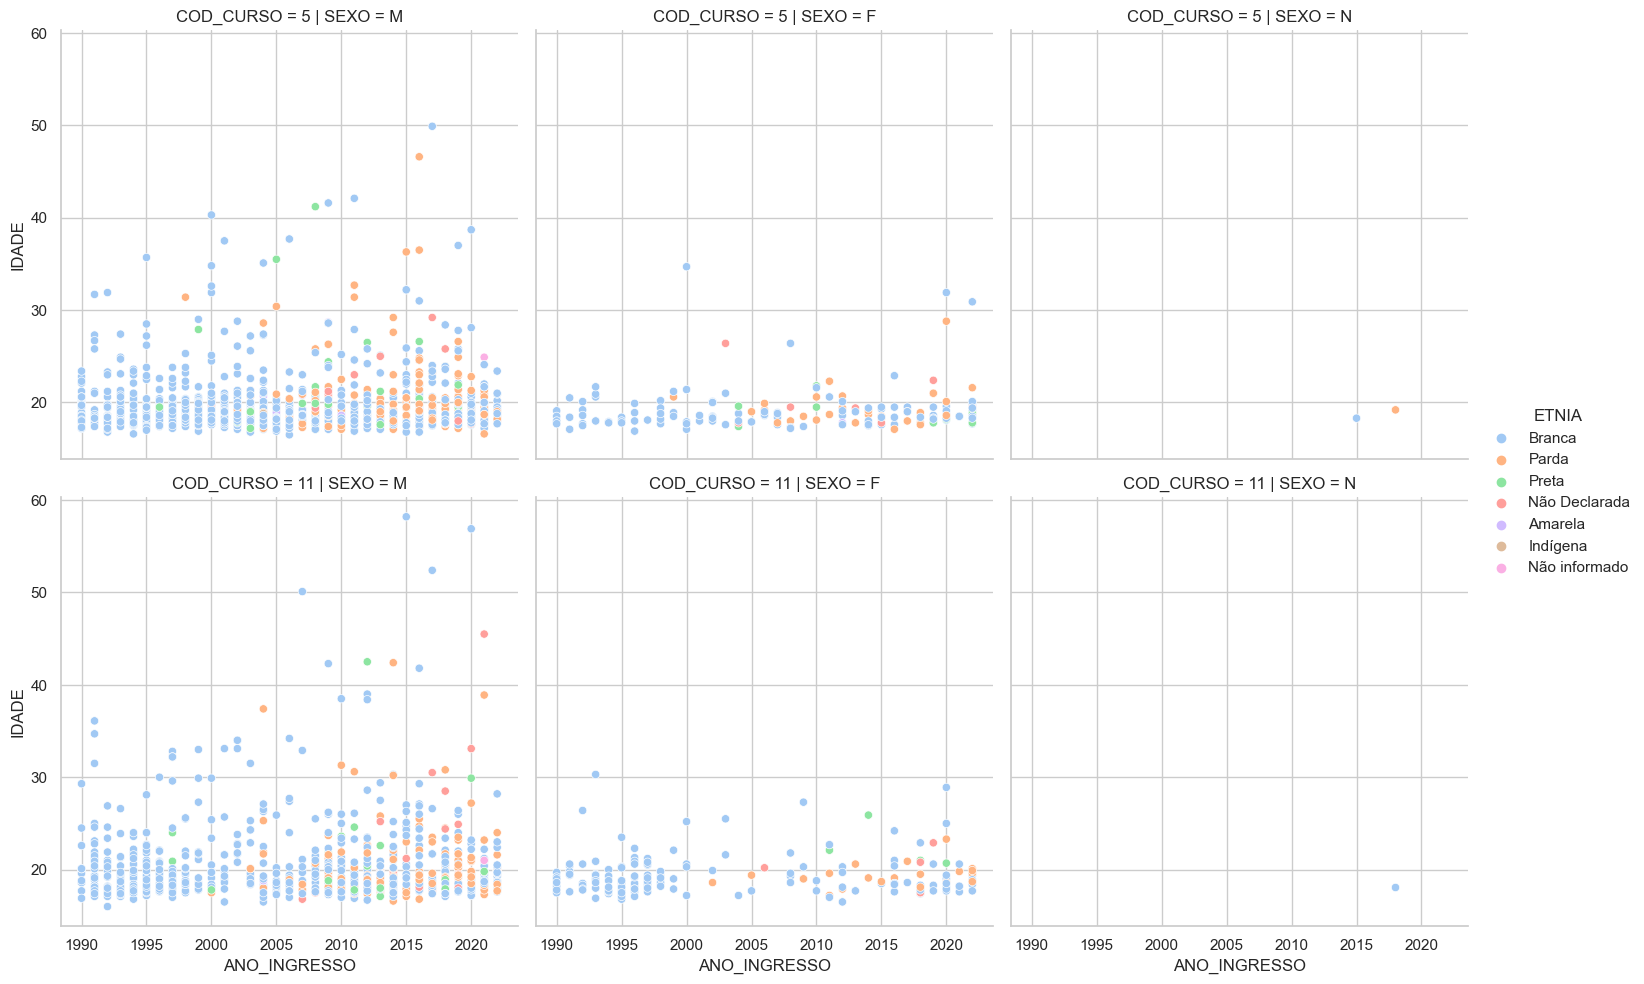

In [21]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="SEXO",hue="ETNIA",row="COD_CURSO")

Interessante notar que antes da implentação da Lei de Cotas(Lei 12.711 de 2012) existia uma predominância de pessoas brancas(quase uma exclusividade). Quase em 2005 que começaram a aparecer outras Etnias, mas depois de 2013 observa-se uma explosão de variedades etinicas que não existiam antes

### Diferenças Encontradas Mulheres X Homens 

Como a quantidade de mulheres em relação aos homens é de fato menor não faz sentido por exemplo ver a porcentagem de mulheres formadas em relação ao total geral. Mas se for analisado a porcentagem de mulheres formadas em relação ao total de mulheres podemos comparar com o mesmo racícionio feito para os homens

In [31]:
tab_evasao, tabper_evasao = crosstabper(eng,"FORMA_EVASAO")
tabper_evasao

SEXO,F,M,N
FORMA_EVASAO,,,
Desistência,20.987654,17.079208,100.0
Desligado,12.962963,19.389439,0.0
Falecimento,0.000000,0.082508,0.0
Formado,37.654321,41.831683,0.0
Reopção de Curso,2.469136,3.135314,0.0
Sem evasão,25.308642,16.419142,0.0
Transferência para outra institução,0.617284,2.062706,0.0


As porcentagens de desistência, tranferência para outra instituição e desistência são bem similares entre ambos os gêneros. Porém a quantidade de desligadas é significativamente menor para as mulheres enquanto o número de mulheres formadas é bem maior do que dos homens

In [23]:
tab_cota, tabper_cota = crosstabper(df,"COTISTA")
tabper_cota

SEXO,F,M,N
COTISTA,,,
N,82.848837,81.078524,66.666667
S,17.151163,18.921476,33.333333


In [24]:
tab_etnia, tabper_etnia = crosstabper(df,"ETNIA")
tabper_etnia

SEXO,F,M,N
ETNIA,,,
Amarela,0.290698,0.425733,0.000000
Branca,77.906977,75.638600,66.666667
Indígena,0.000000,0.189215,0.000000
Não Declarada,3.197674,2.223273,0.000000
Não informado,0.000000,0.094607,0.000000
Parda,15.116279,17.928098,33.333333
Preta,3.488372,3.500473,0.000000


In [25]:
tab_estadocivil, tabper_estadocivil = crosstabper(df,"ESTADO_CIVIL")
tabper_estadocivil

SEXO,F,M,N
ESTADO_CIVIL,,,
Casado(a),3.834808,5.250597,0.0
Divorciado(a),0.294985,0.238663,0.0
Outros,0.000000,0.095465,0.0
Separado Judicialmente,0.000000,0.047733,0.0
Separado(a) Judicialmente,0.294985,0.000000,0.0
Solteiro(a),94.985251,93.985680,100.0
Uniao Estavel,0.589971,0.381862,0.0


Para as variáveis cota, etnia e estado civil não existe diferença significativa na distribuição entre os sexos

### Tentativa de Delinear o Perfil via Redução Dimensaional 

Como existem muitas variáveis categorias existe a possibilidade de fazer Encoder e aplicar o PCA ou utilizar outra técnica que lide bem com esse tipo de variáveis

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
femi_encoded = pd.DataFrame(onehot_encoder.fit_transform(femi[femi.columns[femi.dtypes == 'object']]).toarray())
femi_ready_pca = pd.concat([femi[femi.columns[femi.dtypes != 'object']], femi_encoded], axis=1)
femi_ready_pca.dropna(inplace=True)
femi_ready_pca.columns = femi_ready_pca.columns.astype(str)


Muitos dados faltantes no dataset original, tanto de 344 alunas só foram utilizadas 36 por causa desses dadod ausentes

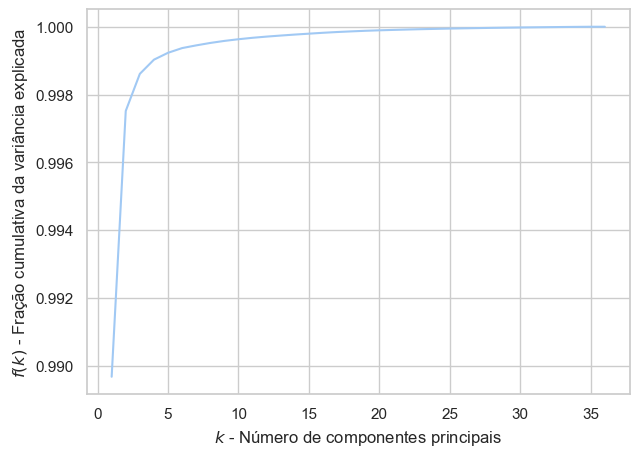

In [27]:
pca = PCA(n_components=36)
pca.fit(femi_ready_pca)

fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada');

Existem muitos valores faltantes no dataset original e por isso codificação One-Hot produziu NaNs na representação codificada e para que o PCA fosse possível foi necessário retirá-los. Portanto, esse PCA não representa de fato a realiadade

## Conclusões e Discussões

* A porcentagem de participação feminina é similar a encontrada em outras universidades brasileiras

* Não existe diferença significativa nas idades máxima, mínina, média e mediana para ambos os gêneros

* As mulheres mesmo sendo minioria possuem uma tendência maior a se formar e desistem menos do curso 

* Da maneira que foi feita e com os dados disponíveis não foi delinear um perfil via redução dimensional usando o PCA.

* É necessário entender o porque de tantos dados faltantes, encontrar estratégias de tratamento e repetir o processo de aplicação do PCA

* Também é possível utilizar outras técnicas que lidem com variáveis categoricas e númericas como a técnica Factor Analysis of Mixed Data (FAMD)

### Referências

BORDIN, A. S.; FERRãO, I. G.; BRANCO, K. R. L. J. C. (2021). Women in technology: Uma análise bibliométrica dos últimos cinco anos.

CURSINO, A. R.; MARTINEZ, J. F. P.(2021).Análise estatística descritiva e regressão da inserção das mulheres nos cursos de ti nos anos de 2009 a 2018. 

SANTOS, C. M. Por que as mulheres “desapareceram” dos cur-
sos de computação? (2019). <https://jornal.usp.br/universidade/
por-que-as-mulheresdesapareceram-dos-cursos-de-computacao/>. [Online; acessado em 04-Julho-2022]